In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline
data = pd.read_csv('Mall_Customers.csv')
X = data.iloc[:,[3,4]].values
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Using Dendogram  
Select a threshold distance, draw horizontal line,  
No. of clusters = No. of lines cutting the horizontal line  
Standard Method :: Base distance of line with highest verical length ( that does not cross any horizontal line) + some Threshold

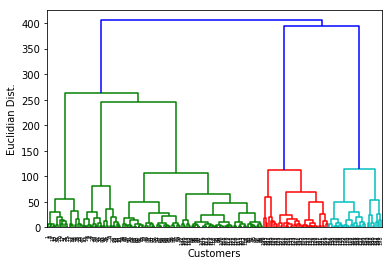

In [2]:
import scipy.cluster.hierarchy as sch
# ward method tries to minimize variance within each cluster
model = sch.dendrogram(sch.linkage(X, method='ward'))  # Linkage is the algorithm for Hierarchical Clustering
plt.xlabel("Customers")
plt.ylabel("Euclidian Dist.")
plt.show()

## Using AgglomerativeClustering
Mark each point as cluster  
Merge two nearest clusters till 1 cluster remain  

In [3]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
y_pred = model.fit_predict(X)

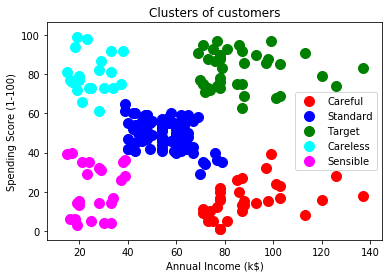

In [4]:
# Visualising the clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Careful') #High income, Low spend
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Standard') #Avg. icome, Avg. spend
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Target') # High income, High spend
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Careless') #Low Income, High spend
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Sensible') #Low Income, Low spend
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()